# Password Strength Prediction Using NLP Project


Details about Data     
Password - 1000k unique values for password collected online

Strength - three values(0 , 1 , 2) i.e. 0 for weak, 1 for medium, 2 for strong..
Strength of the password based on rules(such as containing digits, special symbols , etc.)


The passwords used in our analysis are from 000webhost leak that is available online



In [111]:
# lets imports all important librabies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Lets Read our Data From Sql Database

In [112]:
import sqlite3 

In [113]:
con = sqlite3.connect('password_data.sqlite')

In [114]:
data = pd.read_sql_query('select * from Users',con)

In [115]:
data.shape  # so as we seen we have large amout of unique passwords data approx 10k

(100000, 3)

In [116]:
data.head(5)

index                 password  strength
0      0                zxe870819         1
1      1             xw46454nr23l         1
2      2                soporte13         1
3      3  accounts6000webhost.com         2
4      4                 c443balg         1

# Lets.. Do some Basic Data Cleaning

In [117]:
data.columns

Index(['index', 'password', 'strength'], dtype='object')

In [118]:
data.drop(['index'],axis =1,inplace= True)

In [119]:
data.head()

password  strength
0                zxe870819         1
1             xw46454nr23l         1
2                soporte13         1
3  accounts6000webhost.com         2
4                 c443balg         1

### Checking Duplicate Rows

In [120]:
data.duplicated().sum()

0

In [121]:
# so we dont have any duplicate values

### Lets check Misssing Values

In [122]:
data.isnull().sum()

password    0
strength    0
dtype: int64

In [123]:
# we don't have missing values in our data

### lets check DataTypes of every feature

In [124]:
data.dtypes

password    object
strength     int64
dtype: object

### Lets check password strength its relevent or not

In [125]:
data['strength'].unique()

array([1, 2, 0])

In [126]:
## so we have 3 king of password strength

# Lets Performing Semantic Analysis !

    a) How many password textual actually holds only numeric characters ?
      b) How many password textual actually holds only Upper-case character ? 
      
      c) How many password textual actually holds only alphabet ?
      d) How many password textual actually holds alpha-numeric character ? 
      e) How many password textual actually holds title-case character ? 
      
      f) How many password textual actually holds some special special character ? 

In [127]:
data['password']

0                      zxe870819
1                   xw46454nr23l
2                      soporte13
3        accounts6000webhost.com
4                       c443balg
                  ...           
99995                 obejofi215
99996                 fmiopvxb64
99997                  czvrbun38
99998                  mymyxe430
99999                glqjhkxb467
Name: password, Length: 100000, dtype: object

In [128]:
# we have string in python and also some predefind function of string that we will use in this analysis

#### a) How many password textual actually holds only numeric characters ?

In [129]:
data['password'].str.isnumeric().sum()

26

In [130]:
data[data['password'].str.isnumeric()].head(4)

password  strength
12280   943801         0
14992    12345         0
20958   147856         0
21671   140290         0

In [131]:
# we have 26 password that contain only numerical value

#####  b) How many password textual actually holds only Upper-case character ?

In [132]:
data['password'].str.isupper().sum()

1506

In [133]:
data[data['password'].str.isupper()].head(4)

password  strength
115   EYT63119         1
273  INSPIRON6         1
338   1A2S3D4F         1
367  13269123A         1

In [134]:
## we have 1506 password that contain only uppercase character value

##### c) How many password textual actually holds only alphabet ?

In [135]:
data['password'].str.isalpha().sum()

50

In [136]:
 data[data['password'].str.isalpha()].head(4)

password  strength
267   PomarancaÇ         1
1380      smgodt         0
3198       cuado         0
4560       jelsz         0

In [137]:
## we have 50 password that contain only Alphabate as a value

#####  d) How many password textual actually holds alpha-numeric character ? 

In [138]:
data['password'].str.isalnum().sum()

97203

In [139]:
data[data['password'].str.isalnum()].head()

password  strength
0     zxe870819         1
1  xw46454nr23l         1
2     soporte13         1
4      c443balg         1
5     16623670p         1

In [140]:
## we have 97203 password that contain only Alphabate numerical as a value or approx 97% user set value as alphanumerical way

#####  e) How many password textual actually holds title-case character ? 

In [141]:
data['password'].str.istitle().sum()

932

In [142]:
data[data['password'].str.istitle()].head(3)

password  strength
64     Hisanthoshjasika0         2
242  Therockrockbottom72         2
338             1A2S3D4F         1

In [143]:
## we have 932 password that contain only first word in capital latter as a value

##### f) How many password textual actually holds some special special character

In [144]:
import string

In [145]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [146]:
def special_character(row):
    for char in row:
        if char in string.punctuation:
            return 1
        else: 
            pass

In [147]:
data['password'].apply(special_character).sum()

2663.0

In [148]:
## 2663 observations have special characters in between them ..
## 2.6% people password actually uses special character in their password ..

# Lets Applying Feature Engineering !

I have password strength so you can do a quick google search to check what features password depends on:-
It depends on 5 factors :

    Length of password
    Frequency of Lowercase Characters
    Frequency of Uppercase Characters
    Frequency of Numeric Characters
    Frequency of Special Characters

These will be the result of the google search to find factors effecting strength of password..

In [149]:
## Length of Password

In [150]:
data['length'] = data['password'].str.len()

In [151]:
data.head(3)

password  strength  length
0     zxe870819         1       9
1  xw46454nr23l         1      12
2     soporte13         1       9

In [152]:
password = 'RajaT'

In [153]:
[char for char in password if char.islower()]

['a', 'j', 'a']

In [154]:
len([char for char in password if char.islower()])/len(password)

0.6

Q..->> why I have diving each value by its Total length or why we are normalizing frequency ? 

Ans : Just  to get rid of some outliers bcz some passwords have huge length as we have seen , hence value of lowercase could 
also be high , so lets normalise it in the range between 0 to 1



In [155]:
def freq_lower(row):
    return np.round(len([char for char in row if char.islower()])/len(row),3)
def freq_upper(row):
    return np.round(len([char for char in row if char.isupper()])/len(row),3)
def freq_numeric(row):
    return np.round(len([char for char in row if char.isdigit()])/len(row),3)
    

In [156]:
data['lower_freq'] = data['password'].apply(freq_lower)

In [157]:
data['upper_freq'] = data['password'].apply(freq_upper)

In [158]:
data['digit_freq'] = data['password'].apply(freq_numeric)

In [159]:
data.head(3)

password  strength  length  lower_freq  upper_freq  digit_freq
0     zxe870819         1       9       0.333         0.0       0.667
1  xw46454nr23l         1      12       0.417         0.0       0.583
2     soporte13         1       9       0.778         0.0       0.222

##### Frequency of Special-case Characters :

In [160]:
def special_char_freq(row):
    special_char = []
    for char in row:
        if not char.isalpha() and not char.isdigit():
            special_char.append(char)
    return len(special_char)
    

In [161]:
data['Special_char_freq']= np.round(data['password'].apply(special_char_freq)/data['length'],3)

In [162]:
data.head(5)

password  strength  length  lower_freq  upper_freq  \
0                zxe870819         1       9       0.333         0.0   
1             xw46454nr23l         1      12       0.417         0.0   
2                soporte13         1       9       0.778         0.0   
3  accounts6000webhost.com         2      23       0.783         0.0   
4                 c443balg         1       8       0.625         0.0   

   digit_freq  Special_char_freq  
0       0.667              0.000  
1       0.583              0.000  
2       0.222              0.000  
3       0.174              0.043  
4       0.375              0.000

# Lets Perform Descriptive Statistics !

In [163]:
data.columns

Index(['password', 'strength', 'length', 'lower_freq', 'upper_freq',
       'digit_freq', 'Special_char_freq'],
      dtype='object')

In [164]:
data[['strength','length']].groupby(['strength']).agg(['min','max','mean','median'])

length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0

In [165]:
col = ['length', 'lower_freq', 'upper_freq',
       'digit_freq', 'Special_char_freq']



for item in col:
    print(item)
    print('-'*15)
    print(data[[item,'strength']].groupby(['strength']).agg(['min','max','mean','median']))
    print('\n')
    print('*'*60)
    

length
---------------
         length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0


************************************************************
lower_freq
---------------
         lower_freq                        
                min    max      mean median
strength                                   
0               0.0  1.000  0.708050  0.714
1               0.0  0.923  0.630067  0.667
2               0.0  0.917  0.424679  0.400


************************************************************
upper_freq
---------------
         upper_freq                        
                min    max      mean median
strength                                   
0               0.0  1.000  0.012872  0.000
1               0.0  0.923  0.007915  0.000
2               0.0  0.889  0.367633  0.429


*********************************

->> Higher the length, Higher the strength

->> In case on alphabet frequency higher is not better. 
    Probably because it'll not be a strong password if max portion is occupied by just alphabets..
    Password has more strength if the char types are spread in decent proportions.


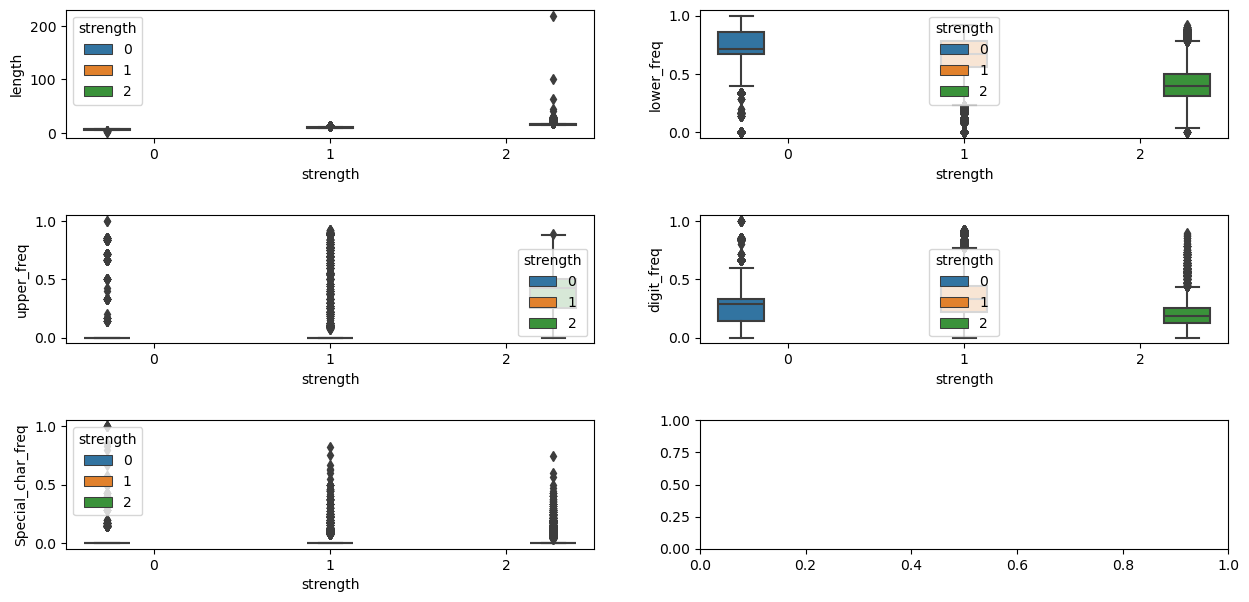

In [166]:
fig , ((ax1 , ax2) , (ax3 , ax4) , (ax5,ax6)) = plt.subplots(3 , 2 , figsize=(15,7))

sns.boxplot(x="strength" , y='length' , hue="strength" , ax=ax1 , data=data)
sns.boxplot(x="strength" , y='lower_freq' , hue="strength" , ax=ax2, data=data)
sns.boxplot(x="strength" , y='upper_freq' , hue="strength" , ax=ax3, data=data)
sns.boxplot(x="strength" , y='digit_freq' , hue="strength" , ax=ax4, data=data)
sns.boxplot(x="strength" , y='Special_char_freq' , hue="strength" , ax=ax5, data=data)

plt.subplots_adjust(hspace=0.6)

'''
Insights :
Regarding the insights we can say that:-



->> Higher Lowercase frequency is seen in low strength passwords. 
    For higher strength passwords ,  Lowercase frequency can be high too but that is probably effect of length.


->> In digit_freq there is a split of majority poplutation of strength 1 and 2 
    but for 0 and 1 strength , there is overlap so no too much to say there. 
    But we can say a nicely propotioned password is good..
    
    
->> In upper_freq , there is a trend but not as strong as length or lower_freq..
    
    
->> Similar but stronger same trend as above in special_freq.

->> Higher strength passwords have more type breaks.


'''

# Lets Feature Importance ! ( How to figure out imp. feature )

In [167]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [168]:
data.columns


Index(['password', 'strength', 'length', 'lower_freq', 'upper_freq',
       'digit_freq', 'Special_char_freq'],
      dtype='object')

In [169]:
def get_dist(data , feature):
    
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    
    sns.violinplot(x='strength' , y=feature , data=data )
    
    plt.subplot(1,2,2)
    
    sns.distplot(data[data['strength']==0][feature] , color="red" , label="0" , hist=False)
    sns.distplot(data[data['strength']==1][feature], color="blue", label="1", hist=False)
    sns.distplot(data[data['strength']==2][feature], color="orange", label="2", hist=False)
    plt.legend()
    plt.show()

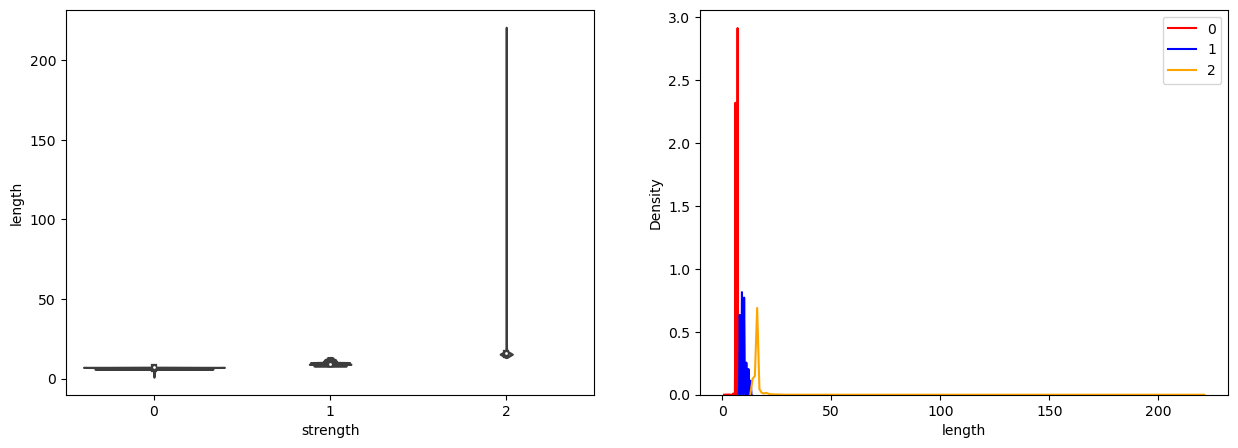

In [170]:
get_dist(data,'length')

In [171]:
### we have few overlappping region in distribution plot 
### when class is 2 , we have higher value of 'length' than class 1 & class 0

## it means 'length' is a interesting feature as we have very less overlapping region

## similarly from violinplot ,we will say on account of less overlappping , 
## this feature 'length' is amazing & useful in determining the strength


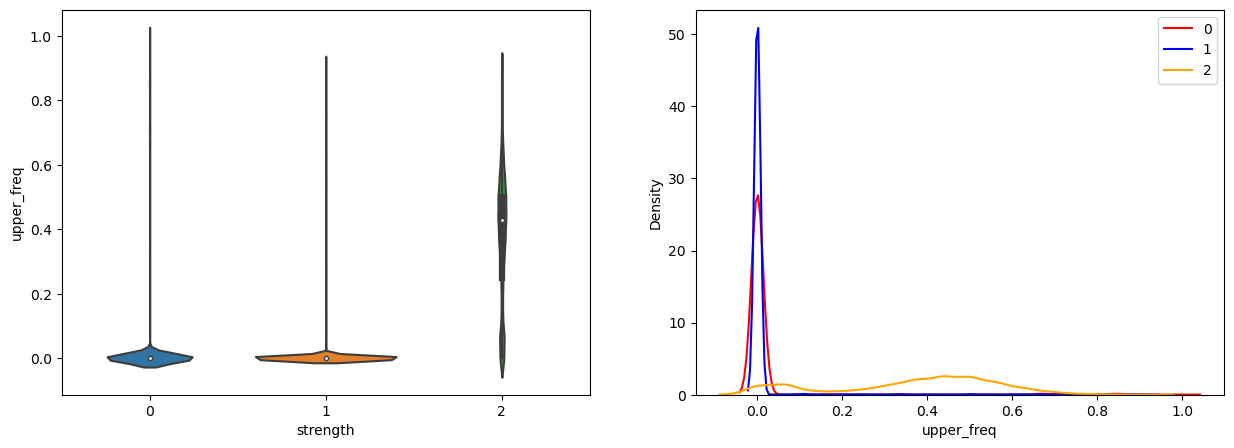

In [172]:
get_dist(data,'upper_freq')

In [173]:
### we have quite high overlappping region in distribution plot 

## it means 'upper_freq' is not that much interesting feature as have some overlapping region

## similarly from violinplot ,we will say on account of such huge overlappping , 
## this feature 'lower_freq' is not a interesting feature in determining the strength

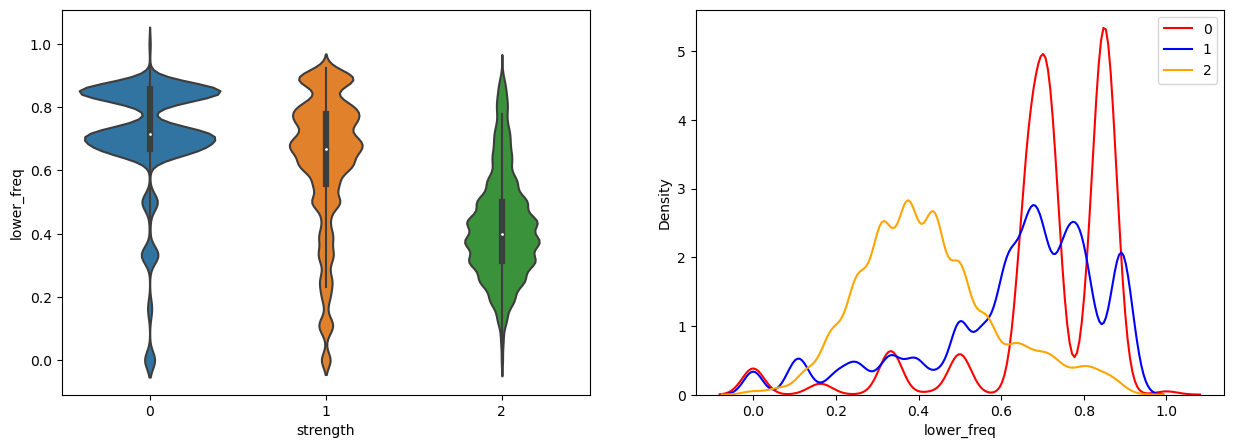

In [174]:
get_dist(data,'lower_freq')

In [175]:
### we have some kind of overlappping region in distribution plot 
### when class is 2 , we have less value of 'lower_freq' than class 1 & class 0

## it means 'lower_freq' is a interesting feature upto some extent as have some overlapping region

## similarly from violinplot ,we will say on account of such overlappping , 
## when class is 2 we have less value of 'lower_freq' than class 1 & class 0
## this feature 'lower_freq' is a interesting feature upto some extent in determining the strength

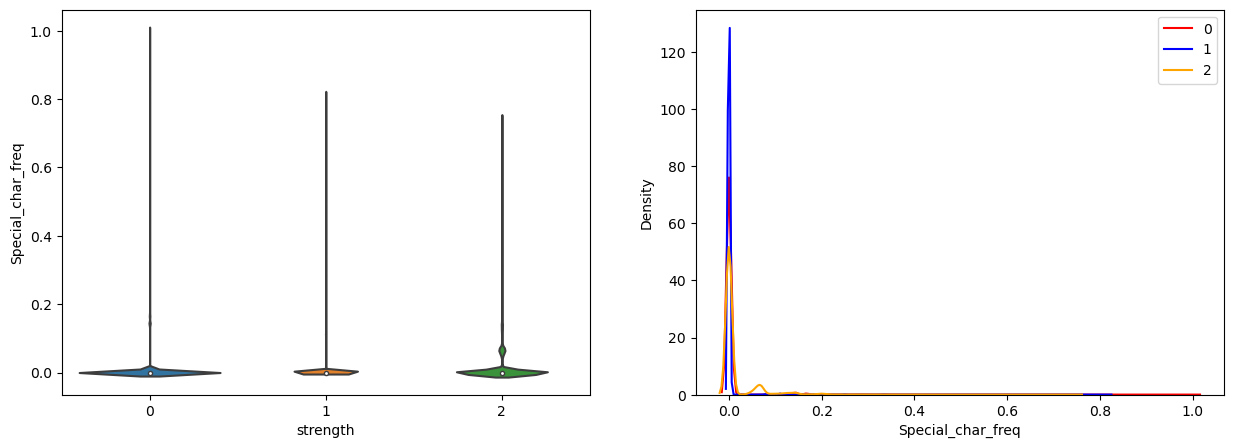

In [176]:
get_dist(data,'Special_char_freq')

In [177]:
'''

Key Insight : It ives us idea that length & lowercase freq are important features..


'''


'\n\nKey Insight : It ives us idea that length & lowercase freq are important features..\n\n\n'

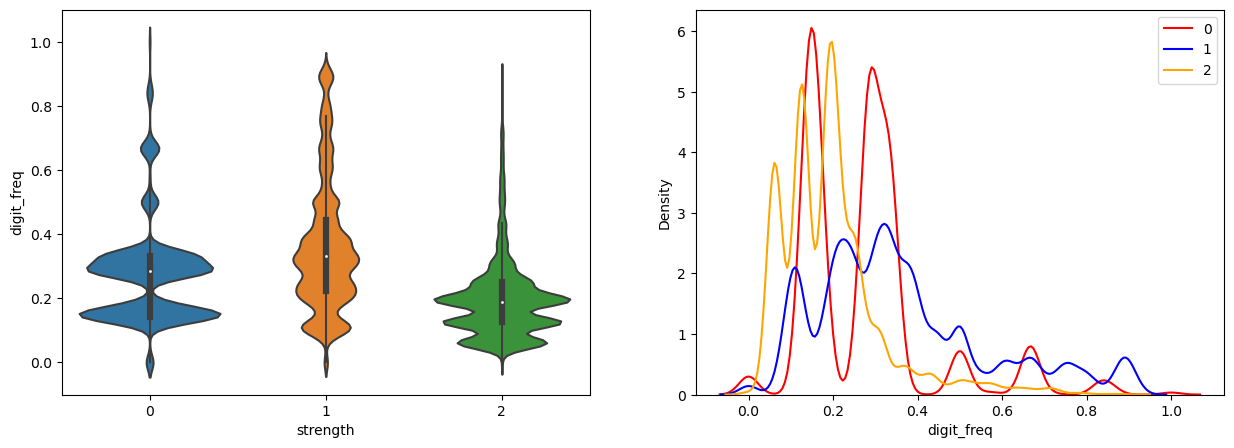

In [178]:
get_dist(data,'digit_freq')

In [179]:
### we have quite high overlappping region in distribution plot 

## it means 'upper_freq' is not that much interesting feature as have some overlapping region

## similarly from violinplot ,we will say on account of such huge overlappping , 
## this feature 'lower_freq' is not a interesting feature in determining the strength

# Lets Applying TF_IDF on data

In [180]:
data.head()

password  strength  length  lower_freq  upper_freq  \
0                zxe870819         1       9       0.333         0.0   
1             xw46454nr23l         1      12       0.417         0.0   
2                soporte13         1       9       0.778         0.0   
3  accounts6000webhost.com         2      23       0.783         0.0   
4                 c443balg         1       8       0.625         0.0   

   digit_freq  Special_char_freq  
0       0.667              0.000  
1       0.583              0.000  
2       0.222              0.000  
3       0.174              0.043  
4       0.375              0.000

In [181]:
dataframe = data.sample(frac=1)  ### shuffling randomly for robustness of ML moodel 

In [182]:
dataframe.head()

password  strength  length  lower_freq  upper_freq  digit_freq  \
25838            cheo33         0       6       0.667       0.000       0.333   
15254  8qhdzJTM4NQpjbiN         2      16       0.500       0.375       0.125   
44750          ledas880         1       8       0.625       0.000       0.375   
56303           openit1         0       7       0.857       0.000       0.143   
36168         bonichso5         1       9       0.889       0.000       0.111   

       Special_char_freq  
25838                0.0  
15254                0.0  
44750                0.0  
56303                0.0  
36168                0.0

In [183]:
x = list(dataframe['password'])

In [184]:
from sklearn.feature_extraction.text import TfidfVectorizer ## import TF-IDF vectorizer to convert text data into numerical data

In [185]:
#### as password is a series of chars , we have to calculate TF_IDF values of each char 
#### Thats why we have to split our password as-->>
#### kzde5577-->> ['k', 'z', 'd', 'e', '5', '5', '7', '7']


### then we can compute Tf-Idf value of each character like Tf-IDF value of k , Tf-IDF value of z


In [186]:
vectorizer = TfidfVectorizer(analyzer="char")

In [187]:
X = vectorizer.fit_transform(x)

In [188]:
X.shape


## ie (100000,1) passwords gets represented using (100000, 99)
## ie each password gets represented using 99 dimensions ..

## note : in your case , this dimension might be changed !

(100000, 99)

In [189]:
X

<100000x99 sparse matrix of type '<class 'numpy.float64'>'
	with 842571 stored elements in Compressed Sparse Row format>

In [190]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [191]:
X.toarray()[0] ## TF-IDF scores of Ist row

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.69064358, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.40198636,
       0.        , 0.3006475 , 0.        , 0.        , 0.41422228,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.31535599, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [192]:
len(vectorizer.get_feature_names_out())

99

In [193]:
### returns feature/char_of_passwords/columns names

vectorizer.get_feature_names_out()

## ie these are the various chars to which different TF-IDF values are assigned for 100000 passwords ..

array(['\x04', '\x06', '\x08', '\x0e', '\x10', '\x11', '\x17', ' ', '!',
       '#', '$', '%', '&', '(', ')', '*', '+', '-', '.', '/', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', ';', '<', '=', '>', '?',
       '@', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f',
       'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
       't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '¡', '¨',
       '°', '±', '³', '´', 'µ', '·', 'ß', 'à', 'á', 'ä', 'æ', 'ç', 'é',
       'ê', 'í', 'ñ', 'ó', 'õ', 'ö', '÷', 'ú', 'ü', 'ý', 'þ', '›'],
      dtype=object)

In [194]:
df2 = pd.DataFrame(X.toarray() , columns=vectorizer.get_feature_names_out())

In [195]:
df2

                                 !    #  ...    ñ    ó    õ  \
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
99995  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
99996  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
99997  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
99998  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
99999  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

         ö    ÷    ú    ü    ý    þ    ›  
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...    ...  ...  ...  ...  ...  ...  ...  
99995  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
99996  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
99997  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
99998  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
99999  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[100000 rows x 99 columns]

# Lets Applying Machine Learning algorithm 

In [196]:
dataframe.columns

Index(['password', 'strength', 'length', 'lower_freq', 'upper_freq',
       'digit_freq', 'Special_char_freq'],
      dtype='object')

In [197]:
df2['lenght']=dataframe['length']
df2['lower_freq']=dataframe['lower_freq']

In [198]:
df2.head()

                                 !    #  ...    õ    ö    ÷    ú  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

     ü    ý    þ    ›  lenght  lower_freq  
0  0.0  0.0  0.0  0.0       9       0.333  
1  0.0  0.0  0.0  0.0      12       0.417  
2  0.0  0.0  0.0  0.0       9       0.778  
3  0.0  0.0  0.0  0.0      23       0.783  
4  0.0  0.0  0.0  0.0       8       0.625  

[5 rows x 101 columns]

In [199]:
y = data['strength']

split data into train & test
        train---> To learn the relationship within data, 
        test-->  To do predictions, and this testing data will be unseen to my model

In [200]:
from sklearn.model_selection import train_test_split

In [201]:
X_train, X_test, y_train, y_test = train_test_split( df2, y, test_size=0.20)

In [202]:
X_train.shape

(80000, 101)

In [203]:
y_train.shape

(80000,)

In [204]:
from sklearn.linear_model import LogisticRegression

In [205]:
## Apply Multinomial logistic Regression as have data have 3 categories in outcomes

clf = LogisticRegression(multi_class="multinomial")

In [206]:
clf.fit(X_train , y_train)

LogisticRegression(multi_class='multinomial')

In [207]:
y_pred = clf.predict(X_test)

In [208]:
y_pred

array([1, 2, 1, ..., 1, 1, 1])

In [209]:
from collections import Counter 

In [210]:
Counter(y_pred)

Counter({1: 14728, 0: 2719, 2: 2553})

# Lets check when User Enter Manually Password 

In [211]:
password = '@123abcd##'

In [212]:
simple_array = np.array([password])

In [214]:
simple_matrix = vectorizer.transform(simple_array)

In [215]:
simple_matrix.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.869337  ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.10200081, 0.11800999, 0.13217171, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.34658865, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.09823044, 0.16467147, 0.15386004,
        0.14795531, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [216]:
simple_matrix.toarray().shape

(1, 99)

In [217]:
### right now , array dim. is (1,99) so now we need to make it as : (1,101) so that my model will accept it as input..
### ie we need to add (length_of_password) & (total_lowercase_chars) in passsword

In [218]:
len(password)

10

In [220]:
[char for char in password if char.islower()]

['a', 'b', 'c', 'd']

In [222]:
len([char for char in password if char.islower()])/len(password)

0.4

In [229]:
np.append(simple_matrix.toarray(),(10,0.4))

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.869337  ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.10200081,  0.11800999,  0.13217171,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.34658865,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.09823044,  0.16467147,  0.15386004,
        0.14795531,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [230]:
np.append(simple_matrix.toarray(),(10,0.4)).shape

(101,)

In [234]:
new = np.append(simple_matrix.toarray(),(10,0.4)).reshape(1,101)

In [236]:
new.shape

(1, 101)

In [237]:
clf.predict(new)

array([1])

In [238]:
print(clf.predict(new))

[1]


In [239]:
# it mean this is normal password

In [240]:
# as we seen this is very long process for each password prediction lets automate this process for each and every user enter password

# Lets Automate this Process

In [241]:
def prediction():
    password = input('Enter password for prediction : ')
    print('-'*50)
    simple_array = np.array([password])
    simple_matrix = vectorizer.transform(simple_array)
    length = len(password)
    lower = len([char for char in password if char.islower()])/len(password)
    new = np.append(simple_matrix.toarray(),(length,lower)).reshape(1,101)
    result = clf.predict(new)
    if result == 0:
        print("your password is week : ",password)
    elif result == 1:
        print("your password is Normal : ",password)
    else:
        print("your password is Strong : ",password)
    
    
    
    


In [245]:
prediction()

Enter password for prediction :  Rajat@2611##


--------------------------------------------------
your password is Normal :  Rajat@2611##


In [246]:
prediction()

Enter password for prediction :  RRabja$$@@@!!125abcd


--------------------------------------------------
your password is Strong :  RRabja$$@@@!!125abcd


In [247]:
prediction()

Enter password for prediction :  abc123


--------------------------------------------------
your password is week :  abc123


# Lets check Accuracy of Model

In [248]:
#### check Accuracy of your model using confusion_matrix, accuracy_score

In [249]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report 

In [250]:
accuracy_score(y_test,y_pred)

1.0

In [251]:
confusion_matrix(y_test , y_pred)

array([[ 2719,     0,     0],
       [    0, 14728,     0],
       [    0,     0,  2553]])

In [252]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2719
           1       1.00      1.00      1.00     14728
           2       1.00      1.00      1.00      2553

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



# The-End